In [1]:
from shapely import Point , LineString , LinearRing , Polygon

# object.__eq__(other)

### 如果两个对象的几何类型相同，并且两个对象的坐标精确匹配，则返回True。

In [2]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(0.0, 0.0), (1.0, 1.0)])

In [3]:
a.__eq__(b)

True

# object.equals(other)

### 如果对象的集合边界、内部和外部与另一个对象的边界、内部和外部重合，则返回True。

In [4]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(0, 0), (0.5, 0.5), (1, 1)])
c = LineString([(0, 0), (0, 0), (1, 1)])

In [5]:
a.equals(b)

True

In [6]:
a == b

False

In [7]:
b.equals(c)

True

In [8]:
b == c

False

# object.equals_exact(other, tolerance)

### 如果对象在所有点上都近似等于另一个对象，并达到指定的小数位精度，则返回True。

In [9]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(0.1, 0.1), (1.1, 1.1)])

In [10]:
a.equals_exact(b , tolerance=0.2)

True

In [11]:
a.equals_exact(b , tolerance=0.1)

False

# object.contains(other)

### 如果对象的内部包含另外一个对象的边界和内部，并且两个对象的边界不接触，则返回True。

In [12]:
LineString([(0, 0), (1, 1)]).contains(Point(0.5, 0.5))

True

In [13]:
Point(0.5, 0.5).within(LineString([(0, 0), (1, 1)]))

True

### 一条线的端点是其边界的一部分，因此不包含在内。

In [14]:
LineString([(0, 0), (1, 1)]).contains(Point(1.0, 1.0))

False

### 二元谓词可以直接作为filter()或itertools.ifilter()的谓词使用。

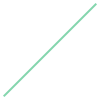

In [15]:
line = LineString([(0, 0), (1, 1)])
line

In [16]:
contained = list(filter(line.contains, [Point(), Point(1.0, 1.0) , Point(0.5, 0.5)]))

D:\Anaconda\lib\site-packages\shapely\predicates.py:540: RuntimeWarning: invalid value encountered in contains
  return lib.contains(a, b, **kwargs)


In [17]:
contained

[<POINT (0.5 0.5)>]

# object.covers(other)

### 如果对象的内部包含另外一个对象的边界和内部，则返回True。这与object.contains(other)相似，只是其没有对内部点的要求。

In [18]:
LineString([(0, 0), (1, 1)]).covers(Point(1.0, 1.0))

True

# object.covered_by(other)

### 如果对象的每一个点都是其他对象的内部或边界上的一个点，则返回真。其等价于other.covers(object)。

# object.crosses(other)

### 如果该对象的内部与另一对象的内部相交但不包含该对象，并且相交处的维数其本身或另一个维度，则返回True。

In [19]:
LineString([(0, 0), (1, 1)]).crosses(LineString([(0, 1), (1, 0)]))

True

### 一条线不跨越它所包含的点。

In [20]:
LineString([(0, 0), (1, 1)]).crosses(Point(0.5, 0.5))

False

# object.disjoint(other)

### 如果该对象的边界和内部与其他对象不相交（按集合论，没有任何同样的元素），则返回True。

In [21]:
Point(0, 0).disjoint(Point(1, 1))

True

In [22]:
line1 = LineString([(0, 0), (1, 1)])
line2 = LineString([(0, 2), (2, 0)])

line1.disjoint(line2)

False

<AxesSubplot:>

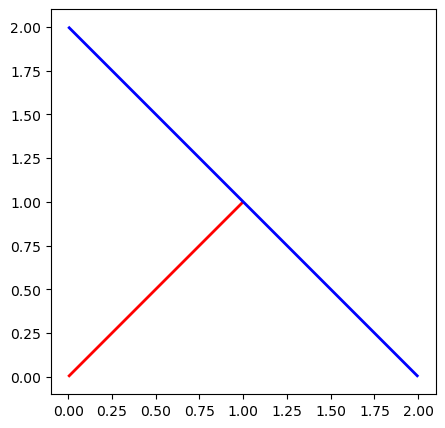

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([line1] , columns=["geometry"]).plot(ax=ax , edgecolor="red" , linewidth=2 )
gpd.GeoDataFrame([line2] , columns=["geometry"]).plot(ax=ax , edgecolor="blue" , linewidth=2)

# object.intersects(other)

### 如果该对象的边界或内部以任何方式与另一对象的边界或内部相交，则返回True。

In [24]:
line1 = LineString([(0, 0), (1, 1)])
line2 = LineString([(0, 2), (2, 0)])

line1.intersects(line2)

True

# object.overlaps(other)

### 如果几何要素有一个以上但不是所有的共同点，具有相同的维数，并且几何要素内部的交点与几何要素本身具有相同的维数，则返回True。

### 也就是两个对象的intersects()为Ture，但是相互之间的within()为False，则返回Ture。

In [25]:
line1 = LineString([(0, 0), (1, 1)])
line2 = LineString([(0, 1), (1, 0)])
line3 = LineString([(0, 1), (0.5, 0.5), (1, 1), (2, 0)])

In [26]:
line1.overlaps(line2)

False

In [27]:
line1.overlaps(line3)

True

<AxesSubplot:>

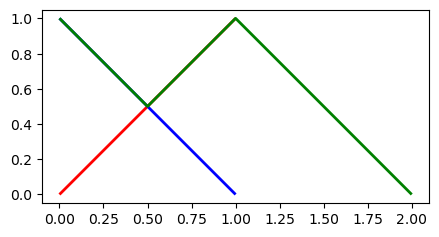

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([line1] , columns=["geometry"]).plot(ax=ax , edgecolor="red" , linewidth=2)
gpd.GeoDataFrame([line2] , columns=["geometry"]).plot(ax=ax , edgecolor="blue" , linewidth=2)
gpd.GeoDataFrame([line3] , columns=["geometry"]).plot(ax=ax , edgecolor="green" , linewidth=2)

# object.touches(other)

### 如果对象的边界仅与另一个对象的边界相交，并且不与另一个对象的其他部分相交，则返回True。

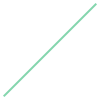

In [29]:
a = LineString([(0, 0), (1, 1)])
a

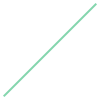

In [30]:
b = LineString([(1, 1), (2, 2)])
b

In [31]:
a.touches(b) , a.intersects(b) , a.overlaps(b)

(True, True, False)

# object.within(other)

### 如果对象的边界和内部仅与另一个对象的内部相交（而不是其边界或外部），则返回True。

### 在sorted()键中使用，within()使对象的空间排序变得容易。假设我们有4个要素：一个被一个多边形所包含的点，而这个多边形本身又被另一个多边形所包含，以及一个没有被包含的自由点。

In [32]:
a = Point(2, 2)
b = Polygon([[1, 1], [1, 3], [3, 3], [3, 1]])
c = Polygon([[0, 0], [0, 4], [4, 4], [4, 0]])
d = Point(-1, -1)

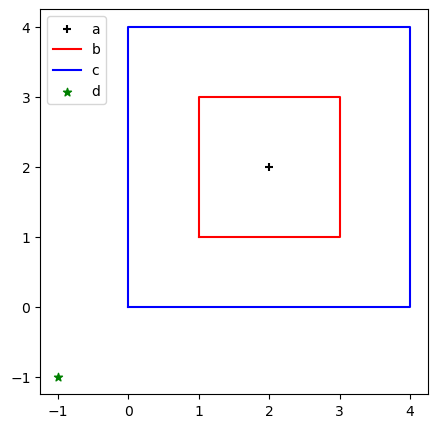

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(figsize=(5,5))

ax.scatter(2,2 , color="k" , marker="+", label="a")
ax.plot((1,1,3,3,1) , (1,3,3,1,1) , color="red" , label="b")
ax.plot((0,0,4,4,0) , (0,4,4,0,0) , color="blue" , label="c")
ax.scatter(-1,-1 , color="green" , marker="*", label="d")

plt.legend()

### 这些对象被收集到一个列表中

In [34]:
features = [c, a, d, b, c]

### 我们倾向于将其排序为 [d, c, c, b, a] 的反向包含顺序。正如在 Python Sorting HowTo 中所解释的，我们可以定义一个键函数，对每个列表元素进行操作，并返回一个值进行比较。我们的键函数将是一个包装类，它使用 Shapely 的二进制 within() 谓词实现 。

In [35]:
class Within:
    def __init__(self , o):
        self.o = o
    def __lt__(self , other): # python内置的比较运算符 __lt__(self, other) ——> 定义小于号的行为：x < y 调用 x.__lt__(y)
        return self.o.within(other.o)

### 正如Python Sorting HowTo 中所解释的，小于的比较是保证在排序中使用的。这就是我们要依靠的空间排序。在特征d和c上试了一下，我们发现它是有效的。

In [36]:
Within(d) < Within(c) # 调用 d.__lt__(c) ——> d.within(c)

False

### 它也在功能列表上工作，产生我们想要的顺序。

In [37]:
[d, c, c, b, a] == sorted(features, key=Within, reverse=True) # 降序排列

True